In [57]:
import pandas as pd
VAERSDATA_df=pd.DataFrame(pd.read_csv('2023VAERSDATA.csv',encoding='latin1')) 
VAERSSYMPTOMS_df=pd.DataFrame(pd.read_csv('2023VAERSSYMPTOMS.csv',encoding='latin1'))
VAERSVAX_df=pd.DataFrame(pd.read_csv('2023VAERSVAX.csv',encoding='latin1'))



In [58]:
VAERSDATA_df.head(1)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,2547730,01/01/2023,DE,53.0,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,diabetic,NaN,NaN,NaN,2,12/31/2022,NaN,NaN,NaN,none


In [59]:
VAERSSYMPTOMS_df.head(1)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,2547730,Blood pressure orthostatic abnormal,25.1,COVID-19,25.1,Coma,25.1,Computerised tomogram,25.1,Exposure to SARS-CoV-2,25.1


In [60]:
VAERSVAX_df.head(1)

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,2547730,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))


In [61]:
VAERSVAX_df['VAX_TYPE'].unique()

array(['COVID19', 'COVID19-2', 'TDAP', 'UNK', 'FLUA4', 'SMALLMNK',
       'VARZOS', 'FLUX', 'FLU4', 'HIBV', 'HPV4', 'HPV9', 'HEPA', 'RV5',
       'MNQ', 'DTAPIPV', 'DTAP', 'FLUC4', 'HEP', 'PNC20', 'TD',
       'DTAPIPVHIB', 'MMR', 'MMRV', 'MENB', 'PNC13', 'VARCEL',
       'DTAPHEPBIP', 'RV1', 'PPV', 'FLUN3', 'DTPPVHBHPB', 'FLUR4', 'IPV',
       'TYP', 'YF', 'HEPAB', 'FLUN4', 'RVX', 'PNC15', 'ADEN_4_7', 'ANTH',
       'FLU3', 'FLUC3', 'SMALL', 'MEN', 'RAB', 'HPVX', 'FLUR3', 'DT',
       'PNC', 'JEV1', 'BCG', 'TTOX', 'MEA', 'MU', 'FLUA3', 'TBE', 'DF',
       'DTOX', 'DTP', 'RSV', 'CHOL', 'EBZR'], dtype=object)

In [62]:
filtered_VAERSVAX_df=VAERSVAX_df.loc[VAERSVAX_df['VAX_TYPE'].isin(['COVID19','COVID19-2'])]


In [63]:
VAERS_ID_list=filtered_VAERSVAX_df['VAERS_ID'].unique().tolist()
VAERS_ID_list=VAERS_ID_list[-10001:-1]
len(VAERS_ID_list)

10000

In [64]:
filtered_VAERSVAX_df=VAERSVAX_df.loc[VAERSVAX_df['VAERS_ID'].isin(VAERS_ID_list)]
filtered_VAERSVAX_df.head(1)

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
88794,2679092,COVID19,PFIZER\BIONTECH,NaN,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))


In [65]:
len(filtered_VAERSVAX_df['VAERS_ID'].unique().tolist())

10000

In [66]:
filtered_VAERSSYMPTOMS_df=VAERSSYMPTOMS_df.loc[VAERSSYMPTOMS_df['VAERS_ID'].isin(VAERS_ID_list)]
filtered_VAERSSYMPTOMS_df.head(1)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
95638,2679092,Frequent bowel movements,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
len(filtered_VAERSSYMPTOMS_df['VAERS_ID'].unique().tolist())

10000

## Build Standard Symptom List

In [68]:
new_df=filtered_VAERSSYMPTOMS_df[["VAERS_ID" ,"SYMPTOM1","SYMPTOM2","SYMPTOM3","SYMPTOM4","SYMPTOM5"]].fillna('')
new_df.head(2)

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
95638,2679092,Frequent bowel movements,,,,
95639,2679094,Malaise,Pain in extremity,,,


In [69]:
data_new1=new_df.groupby(['VAERS_ID'])['SYMPTOM1'].apply(list).to_frame()
data_new1['SYMPTOM1']=data_new1['SYMPTOM1'].apply(lambda x:eval(str(x).replace('[','').replace(']','')))
data_new2=new_df.groupby(['VAERS_ID'])['SYMPTOM2'].apply(list).to_frame()
data_new2['SYMPTOM2']=data_new2['SYMPTOM2'].apply(lambda x:eval(str(x).replace('[','').replace(']','')))
data_new3=new_df.groupby(['VAERS_ID'])['SYMPTOM3'].apply(list).to_frame()
data_new3['SYMPTOM3']=data_new3['SYMPTOM3'].apply(lambda x:eval(str(x).replace('[','').replace(']','')))
data_new4=new_df.groupby(['VAERS_ID'])['SYMPTOM4'].apply(list).to_frame()
data_new4['SYMPTOM4']=data_new4['SYMPTOM4'].apply(lambda x:eval(str(x).replace('[','').replace(']','')))
data_new5=new_df.groupby(['VAERS_ID'])['SYMPTOM5'].apply(list).to_frame()
data_new5['SYMPTOM5']=data_new5['SYMPTOM5'].apply(lambda x:eval(str(x).replace('[','').replace(']','')))
data_new1

,SYMPTOM1
VAERS_ID,
2679092,Frequent bowel movements
2679094,Malaise
2679095,Malaise
2679096,Malaise
2679097,Malaise
...,...
2703533,COVID-19
2703534,COVID-19
2703569,"(Allergy test positive, Drug hypersensitivity,..."


In [70]:
combined=pd.concat([data_new1,data_new2,data_new3,data_new4,data_new5],axis=1)
combined

,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
VAERS_ID,,,,,
2679092,Frequent bowel movements,,,,
2679094,Malaise,Pain in extremity,,,
2679095,Malaise,Pain in extremity,,,
2679096,Malaise,Pain in extremity,,,
2679097,Malaise,Pain in extremity,,,
...,...,...,...,...,...
2703533,COVID-19,Drug ineffective,,,
2703534,COVID-19,Drug ineffective,,,
2703569,"(Allergy test positive, Drug hypersensitivity,...","(Allergy to plants, Food allergy, )","(Blood test normal, Hypersensitivity, )","(Depression, Laboratory test normal, )","(Discomfort, Pruritus, )"


In [71]:
a=(1,2)
if type(a)is tuple:
    print("ss")

ss


In [72]:
std_list=[]
for index,row in combined.iterrows():
    res=[]
    for i in range(1,6):
        if len(row['SYMPTOM'+str(i)])>0:
            st=row['SYMPTOM'+str(i)]
            if type(st)is tuple:
                sl=list(st)
                res=sl+res
            else:
                res.append(st)
    res=[x for x in res if x != '']
    std_list.append(res)

In [73]:
std_list

[['Frequent bowel movements'],
 ['Malaise', 'Pain in extremity'],
 ['Malaise', 'Pain in extremity'],
 ['Malaise', 'Pain in extremity'],
 ['Malaise', 'Pain in extremity'],
 ['Malaise', 'Pain in extremity'],
 ['Eczema',
  'Inappropriate schedule of product administration',
  'Pruritus',
  'Rash',
  'Skin fissures'],
 ['COVID-19', 'Drug ineffective'],
 ['Contusion', 'Pruritus', 'Skin disorder', 'Skin haemorrhage'],
 ['Contusion', 'Pruritus', 'Skin haemorrhage', 'Skin necrosis'],
 ['Contusion', 'Haemorrhage', 'Pruritus', 'Skin necrosis'],
 ['Contusion', 'Haemorrhage', 'Pruritus', 'Skin necrosis'],
 ['COVID-19', 'SARS-CoV-2 test', 'Vaccination failure'],
 ['COVID-19', 'Drug ineffective'],
 ['COVID-19', 'Drug ineffective', 'SARS-CoV-2 test'],
 ['COVID-19', 'Drug ineffective', 'SARS-CoV-2 test'],
 ['SARS-CoV-2 test',
  'Musculoskeletal disorder',
  'Large intestine perforation',
  'Balance disorder',
  'Arthralgia',
  'Spinal pain'],
 ['COVID-19', 'Drug ineffective'],
 ['Pain in extremity'],


In [74]:
filtered_VAERSDATA_df=VAERSDATA_df.loc[VAERSDATA_df['VAERS_ID'].isin(VAERS_ID_list)]
filtered_VAERSDATA_df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
13956,2681484,01/30/2023,NaN,77.0,76.0,NaN,M,NaN,No Adverse event; reported that they inadverte...,NaN,...,NaN,NaN,NaN,"USMODERNATX, INC.MOD20237",2,01/30/2023,NaN,NaN,NaN,NaN
13957,2681485,01/30/2023,NaN,48.0,47.0,NaN,M,NaN,No Adverse event; reported that they inadverte...,NaN,...,NaN,NaN,NaN,"USMODERNATX, INC.MOD20237",2,01/30/2023,NaN,NaN,NaN,NaN
13958,2681488,01/30/2023,NaN,30.0,29.0,NaN,F,NaN,Administred Dose 1 on 28-Jan-2021 and Dose 2 ...,NaN,...,NaN,NaN,NaN,"USMODERNATX, INC.MOD20237",2,01/30/2023,NaN,NaN,NaN,NaN
14885,2680314,01/31/2023,CA,75.0,74.0,NaN,F,NaN,pain/Achy; Tiredness; mild flu-like symptoms; ...,NaN,...,Blood pressure high; Borderline diabetes (Impr...,Medical History/Concurrent Conditions: Knee su...,NaN,"USMODERNATX, INC.MOD20226",2,01/30/2023,NaN,NaN,NaN,NaN
14886,2681490,01/31/2023,NaN,30.0,30.0,NaN,F,NaN,No Adverse event; A pharmacy staff reports tha...,NaN,...,NaN,NaN,NaN,"USMODERNATX, INC.MOD20237",2,01/30/2023,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90916,2703533,10/27/2023,CA,49.0,NaN,NaN,M,NaN,After recovery I experienced long Covid sympto...,NaN,...,NaN,Medical History/Concurrent Conditions: Penicil...,NaN,USPFIZER INCPV20230017548,2,10/26/2023,NaN,NaN,NaN,NaN
90917,2703534,10/27/2023,NaN,NaN,NaN,NaN,F,NaN,got COVID; got COVID; This is a spontaneous re...,NaN,...,NaN,NaN,NaN,USPFIZER INCPV20230017556,2,10/26/2023,NaN,NaN,NaN,NaN
90942,2703569,10/27/2023,NaN,34.0,34.0,NaN,M,NaN,After one month on my second shot vaccine star...,NaN,...,No,No,NaN,NaN,2,10/27/2023,NaN,NaN,NaN,No
90943,2703571,10/27/2023,NaN,NaN,70.0,NaN,F,NaN,The patient had a sore arm; This spontaneous c...,NaN,...,Migraine,NaN,NaN,"USMODERNATX, INC.MOD20237",2,10/27/2023,NaN,NaN,NaN,NaN


In [75]:
len(filtered_VAERSDATA_df['VAERS_ID'].unique().tolist())

10000

# Data Statistics

## Dose series

In [76]:
import matplotlib.pyplot as plt



In [77]:
dose=filtered_VAERSVAX_df['VAX_DOSE_SERIES'].value_counts()

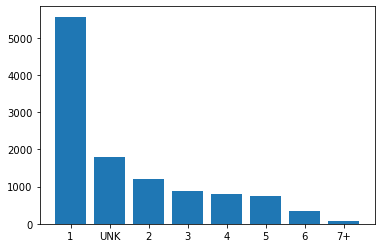

In [78]:
data = dose.values.tolist()
labels = dose.index.tolist()

plt.bar(range(len(data)), data, tick_label=labels)
plt.show()

## Report Length

In [79]:
len_re=filtered_VAERSSYMPTOMS_df['VAERS_ID'].value_counts()
len_re_list=len_re.values.tolist()
dist_re = pd.value_counts(len_re_list)
dist_re

1     8678
2      860
3      256
4       75
5       47
6       25
7       18
8       11
10      11
9        6
11       4
32       1
12       1
13       1
14       1
15       1
17       1
19       1
20       1
36       1
dtype: int64

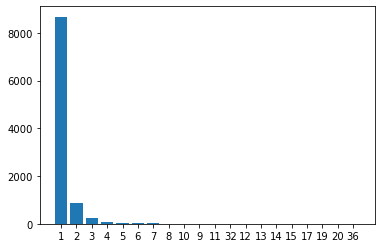

In [80]:
data = dist_re.values.tolist()
labels = dist_re.index.tolist()

plt.bar(range(len(data)), data, tick_label=labels)
plt.show()

## Symptom Counts

In [81]:

from collections import Counter

In [82]:
SYMPTOM1=Counter(filtered_VAERSSYMPTOMS_df['SYMPTOM1'].value_counts().to_dict())
SYMPTOM2=Counter(filtered_VAERSSYMPTOMS_df['SYMPTOM2'].value_counts().to_dict())
SYMPTOM3=Counter(filtered_VAERSSYMPTOMS_df['SYMPTOM3'].value_counts().to_dict())
SYMPTOM4=Counter(filtered_VAERSSYMPTOMS_df['SYMPTOM4'].value_counts().to_dict())
SYMPTOM5=Counter(filtered_VAERSSYMPTOMS_df['SYMPTOM5'].value_counts().to_dict())

In [83]:
SYMPTOM1

Counter({'Product storage error': 3169,
         'COVID-19': 1059,
         'Expired product administered': 394,
         'Incorrect dose administered': 348,
         'Chills': 251,
         'Arthralgia': 201,
         'Discontinued product administered': 169,
         'Asthenia': 163,
         'Unevaluable event': 153,
         'Dizziness': 149,
         'Fatigue': 146,
         'Acute respiratory failure': 124,
         'Pyrexia': 114,
         'Headache': 113,
         'No adverse event': 113,
         'Breakthrough COVID-19': 109,
         'Pain in extremity': 106,
         'Injection site erythema': 103,
         'Erythema': 84,
         'Pain': 79,
         'Inappropriate schedule of product administration': 70,
         'Anticoagulant therapy': 69,
         'SARS-CoV-2 test positive': 68,
         'Dyspnoea': 67,
         'Product administered to patient of inappropriate age': 67,
         'Rash': 62,
         'Tinnitus': 58,
         'Acute kidney injury': 53,
         'Nausea'

In [84]:
dist_symp=dict(SYMPTOM1+SYMPTOM2+SYMPTOM3+SYMPTOM4+SYMPTOM5)

In [85]:
dist_symp

{'Product storage error': 3189,
 'COVID-19': 1390,
 'Expired product administered': 395,
 'Incorrect dose administered': 357,
 'Chills': 428,
 'Arthralgia': 232,
 'Discontinued product administered': 170,
 'Asthenia': 273,
 'Unevaluable event': 157,
 'Dizziness': 337,
 'Fatigue': 503,
 'Acute respiratory failure': 161,
 'Pyrexia': 560,
 'Headache': 566,
 'No adverse event': 402,
 'Breakthrough COVID-19': 109,
 'Pain in extremity': 407,
 'Injection site erythema': 161,
 'Erythema': 144,
 'Pain': 500,
 'Inappropriate schedule of product administration': 85,
 'Anticoagulant therapy': 117,
 'SARS-CoV-2 test positive': 397,
 'Dyspnoea': 356,
 'Product administered to patient of inappropriate age': 118,
 'Rash': 193,
 'Tinnitus': 129,
 'Acute kidney injury': 61,
 'Nausea': 342,
 'Extra dose administered': 52,
 'Diarrhoea': 156,
 'Malaise': 217,
 'Condition aggravated': 170,
 'Cough': 215,
 'Back pain': 83,
 'Blood test': 91,
 'Pruritus': 162,
 'Chest pain': 119,
 'Vomiting': 198,
 'Abdominal

In [86]:
sorted_dist_symp = sorted(dist_symp.items(), key=lambda x:x[1], reverse=True)
converted_dict = dict(sorted_dist_symp)
converted_dict

{'Product storage error': 3189,
 'COVID-19': 1390,
 'Drug ineffective': 723,
 'Headache': 566,
 'Pyrexia': 560,
 'Fatigue': 503,
 'Pain': 500,
 'SARS-CoV-2 test': 450,
 'Chills': 428,
 'Pain in extremity': 407,
 'No adverse event': 402,
 'SARS-CoV-2 test positive': 397,
 'Expired product administered': 395,
 'Incorrect dose administered': 357,
 'Dyspnoea': 356,
 'Nausea': 342,
 'Dizziness': 337,
 'Asthenia': 273,
 'Arthralgia': 232,
 'Malaise': 217,
 'Cough': 215,
 'Myalgia': 215,
 'Injection site pain': 211,
 'Vomiting': 198,
 'Rash': 193,
 'Discontinued product administered': 170,
 'Condition aggravated': 170,
 'Pruritus': 162,
 'Acute respiratory failure': 161,
 'Injection site erythema': 161,
 'COVID-19 pneumonia': 158,
 'Unevaluable event': 157,
 'Diarrhoea': 156,
 'Erythema': 144,
 'Chest X-ray abnormal': 136,
 'Interchange of vaccine products': 131,
 'Injection site swelling': 130,
 'Tinnitus': 129,
 'Vaccination failure': 122,
 'Chest pain': 119,
 'Product administered to patie

In [87]:
def dict_slice(adict, start, end):
    keys = adict.keys()
    dict_slice = {}
    for k in list(keys)[start:end]:
        dict_slice[k] = adict[k]
    return dict_slice


In [88]:
most_symp=dict_slice(converted_dict,0,100)
most_symp

{'Product storage error': 3189,
 'COVID-19': 1390,
 'Drug ineffective': 723,
 'Headache': 566,
 'Pyrexia': 560,
 'Fatigue': 503,
 'Pain': 500,
 'SARS-CoV-2 test': 450,
 'Chills': 428,
 'Pain in extremity': 407,
 'No adverse event': 402,
 'SARS-CoV-2 test positive': 397,
 'Expired product administered': 395,
 'Incorrect dose administered': 357,
 'Dyspnoea': 356,
 'Nausea': 342,
 'Dizziness': 337,
 'Asthenia': 273,
 'Arthralgia': 232,
 'Malaise': 217,
 'Cough': 215,
 'Myalgia': 215,
 'Injection site pain': 211,
 'Vomiting': 198,
 'Rash': 193,
 'Discontinued product administered': 170,
 'Condition aggravated': 170,
 'Pruritus': 162,
 'Acute respiratory failure': 161,
 'Injection site erythema': 161,
 'COVID-19 pneumonia': 158,
 'Unevaluable event': 157,
 'Diarrhoea': 156,
 'Erythema': 144,
 'Chest X-ray abnormal': 136,
 'Interchange of vaccine products': 131,
 'Injection site swelling': 130,
 'Tinnitus': 129,
 'Vaccination failure': 122,
 'Chest pain': 119,
 'Product administered to patie

In [89]:
most_symp.keys()

dict_keys(['Product storage error', 'COVID-19', 'Drug ineffective', 'Headache', 'Pyrexia', 'Fatigue', 'Pain', 'SARS-CoV-2 test', 'Chills', 'Pain in extremity', 'No adverse event', 'SARS-CoV-2 test positive', 'Expired product administered', 'Incorrect dose administered', 'Dyspnoea', 'Nausea', 'Dizziness', 'Asthenia', 'Arthralgia', 'Malaise', 'Cough', 'Myalgia', 'Injection site pain', 'Vomiting', 'Rash', 'Discontinued product administered', 'Condition aggravated', 'Pruritus', 'Acute respiratory failure', 'Injection site erythema', 'COVID-19 pneumonia', 'Unevaluable event', 'Diarrhoea', 'Erythema', 'Chest X-ray abnormal', 'Interchange of vaccine products', 'Injection site swelling', 'Tinnitus', 'Vaccination failure', 'Chest pain', 'Product administered to patient of inappropriate age', 'Anticoagulant therapy', 'Urticaria', 'Breakthrough COVID-19', 'Wrong product administered', 'Syncope', 'Hypoxia', 'Peripheral swelling', 'Feeling abnormal', 'Hyperhidrosis', 'Gait disturbance', 'Tremor', '

### STEP 1: Extracting Symptom-related Entities

In [90]:
# !pip install stanza

In [91]:
import stanza

stanza.download('en', package='mimic', processors={'ner': 'i2b2'})
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})

doc = nlp('The adverse event is that the patient went into a coma state and was non responsive.\
Patient spent almost a month hospitalized and transferred into a nursing home. Trauma to the \
head caused severe orthostatic blood pressure problems, high fall risk, ongoing headaches, and \
caused patient to be exposed to covid, Be advised patient was tested the day before with a PCR 3 \
day covid test that resulted in zero antibodies')
for ent in doc.entities:
    if ent.type == "PROBLEM":
        print(f'{ent.text}\t{ent.type}')

2023-11-29 03:09:09 INFO: Downloading these customized packages for language: en (English)...
| Processor       | Package        |
------------------------------------
| tokenize        | mimic          |
| pos             | mimic_charlm   |
| lemma           | mimic_nocharlm |
| depparse        | mimic_charlm   |
| ner             | i2b2           |
| backward_charlm | mimic          |
| pretrain        | mimic          |
| forward_charlm  | mimic          |

2023-11-29 03:09:09 INFO: File exists: /home/ahmad/stanza_resources/en/tokenize/mimic.pt
2023-11-29 03:09:09 INFO: File exists: /home/ahmad/stanza_resources/en/pos/mimic_charlm.pt
2023-11-29 03:09:09 INFO: File exists: /home/ahmad/stanza_resources/en/lemma/mimic_nocharlm.pt
2023-11-29 03:09:09 INFO: File exists: /home/ahmad/stanza_resources/en/depparse/mimic_charlm.pt
2023-11-29 03:09:09 INFO: File exists: /home/ahmad/stanza_resources/en/ner/i2b2.pt
2023-11-29 03:09:09 INFO: File exists: /home/ahmad/stanza_resources/en/backward_c

2023-11-29 03:09:10 INFO: Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | mimic          |
| pos       | mimic_charlm   |
| lemma     | mimic_nocharlm |
| depparse  | mimic_charlm   |
| ner       | i2b2           |

2023-11-29 03:09:10 INFO: Using device: cpu
2023-11-29 03:09:10 INFO: Loading: tokenize
2023-11-29 03:09:10 INFO: Loading: pos
2023-11-29 03:09:11 INFO: Loading: lemma
2023-11-29 03:09:11 INFO: Loading: depparse
2023-11-29 03:09:11 INFO: Loading: ner
2023-11-29 03:09:11 INFO: Done loading processors!


a coma state	PROBLEM
non responsive	PROBLEM
Trauma	PROBLEM
severe orthostatic blood pressure problems	PROBLEM
high fall risk	PROBLEM
ongoing headaches	PROBLEM
zero antibodies	PROBLEM


In [107]:
import stanza
from tqdm import tqdm

stanza.download('en', package='mimic', processors={'ner': 'i2b2'})
nlp = stanza.Pipeline('en', package='mimic', processors={'ner': 'i2b2'})

vaccine_adverse_affects = [[] for x in range(len(filtered_VAERSDATA_df["SYMPTOM_TEXT"]))]
for i, symptom_description in tqdm(enumerate(filtered_VAERSDATA_df["SYMPTOM_TEXT"])):
    output = nlp(symptom_description)
    for ent in output.entities:
        if ent.type == "PROBLEM":
            vaccine_adverse_affects[i].append(ent.text)       
#         print(f'{ent.text}\t{ent.type}')

2023-11-29 03:21:19 INFO: Downloading these customized packages for language: en (English)...
| Processor       | Package        |
------------------------------------
| tokenize        | mimic          |
| pos             | mimic_charlm   |
| lemma           | mimic_nocharlm |
| depparse        | mimic_charlm   |
| ner             | i2b2           |
| backward_charlm | mimic          |
| pretrain        | mimic          |
| forward_charlm  | mimic          |

2023-11-29 03:21:19 INFO: File exists: /home/ahmad/stanza_resources/en/tokenize/mimic.pt
2023-11-29 03:21:19 INFO: File exists: /home/ahmad/stanza_resources/en/pos/mimic_charlm.pt
2023-11-29 03:21:19 INFO: File exists: /home/ahmad/stanza_resources/en/lemma/mimic_nocharlm.pt
2023-11-29 03:21:20 INFO: File exists: /home/ahmad/stanza_resources/en/depparse/mimic_charlm.pt
2023-11-29 03:21:20 INFO: File exists: /home/ahmad/stanza_resources/en/ner/i2b2.pt
2023-11-29 03:21:20 INFO: File exists: /home/ahmad/stanza_resources/en/backward_c

2023-11-29 03:21:21 INFO: Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | mimic          |
| pos       | mimic_charlm   |
| lemma     | mimic_nocharlm |
| depparse  | mimic_charlm   |
| ner       | i2b2           |

2023-11-29 03:21:21 INFO: Using device: cpu
2023-11-29 03:21:21 INFO: Loading: tokenize
2023-11-29 03:21:22 INFO: Loading: pos
2023-11-29 03:21:22 INFO: Loading: lemma
2023-11-29 03:21:22 INFO: Loading: depparse
2023-11-29 03:21:22 INFO: Loading: ner
2023-11-29 03:21:23 INFO: Done loading processors!
5it [00:23,  4.63s/it]


In [131]:
# !pip install fuzzywuzzy
from fuzzywuzzy import fuzz
best_score = [0] * len(vaccine_adverse_affects[3])
std_symptoms = [0] * len(vaccine_adverse_affects[3])
for i, symptom in enumerate(vaccine_adverse_affects[3]):
    for symptom_standard in dist_symp.keys():
        similarity_score = fuzz.token_set_ratio(symptom, symptom_standard)
        if similarity_score > best_score[i]:
            best_score[i] = similarity_score
            std_symptoms[i] = symptom_standard        

In [133]:
for a,b in zip (vaccine_adverse_affects[3], std_symptoms):
    print(a,"::::::", b)

pain :::::: Pain in extremity
Achy :::::: Apathy
Tiredness :::::: Blindness
mild flu-like symptoms :::::: Menopausal symptoms
soreness in arm shot location :::::: Joint dislocation postoperative
INFLUENZA LIKE ILLNESS :::::: Illness
mild flu-like symptoms :::::: Menopausal symptoms
VACCINATION SITE PAIN :::::: Pain
PAIN (pain/Achy) :::::: Pain
FATIGUE (Tiredness :::::: Fatigue
Past adverse reactions :::::: Adverse reaction
adverse event :::::: No adverse event
Concurrent medical conditions :::::: Medical diet
Drug allergy (Aspirin allergy :::::: Allergy test
Penicillin allergy :::::: Allergy test
Drug allergy :::::: Food allergy
Drug allergy :::::: Food allergy
Drug allergy :::::: Food allergy
Drug allergy (Ibuprofen allergy :::::: Allergy test
Latex allergy :::::: Allergy test
Glaucoma :::::: Glaucoma
Borderline diabetes :::::: Diabetes mellitus
Osteoporosis :::::: Osteoporosis
Glaucoma :::::: Glaucoma
INFLUENZA LIKE ILLNESS :::::: Illness
mild flu-like symptoms :::::: Menopausal symp